Question 1

Question a

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression import gmm  #GMM and related IV estimators are still in the sandbox 
#and have not been included in the statsmodels API yet
import pandas as pd

Simulation

In [2]:
J=10
T=25
u=np.ones(J*T)
x=np.random.uniform(1,2,J*T)
w3=np.random.uniform(0,1,J*T)
w2=np.random.uniform(0,1,J*T)
w1=np.random.uniform(0,1,J*T)

w=np.column_stack((w1,w2,w3))
v=np.column_stack((u,x))

mymeans = [0,0]
mycov = [[1,.7], [.7,1]]

(xsi,omeg)=np.random.multivariate_normal(mymeans,mycov,J*T).T

bet=np.array((2,2))
alp=-2
gam1=np.array((.7,.7))
gam2=np.array((2,2,2))

In [3]:
c=np.dot(v,gam1)+np.dot(w,gam2)+omeg
p=c
delt = np.dot(v,bet)+np.dot(p,alp)+xsi

s=np.ones(J*T)
for t in np.arange(T):
    for j in np.arange(J):
        s[j+t*J] = np.exp(delt[j+J*t])/(1+np.sum(np.exp(delt[t*10:t*10+10])))  #s is the vector containing market shares
#the ten first values of s are the market shares in the first market for products from 1 to J.

Mise en forme de la base de données

In [4]:
m=np.ones(T*J)
prod=np.ones(T*J)
for t in np.arange(T):
    for j in np.arange(J):
        m[j+t*J]=t
        prod[j+t*J]=j

In [ ]:
#v is two dimensional so for the data, we need to take this into consideration. We take v[:,1 for x (ie the second column) 
#w is three dimensional; we divide it into w1..

In [5]:
df=pd.DataFrame({"market" : m, "product" : prod, "mean_utility_level" : delt,"market_share" : s, "price" : p, "observed_characteristics" : v[:,1], "costs_shifter1" : w1, "costs_shifter2" : w2, "costs_shifter3" : w3, "marginal_cost" : c})

In [50]:
np.sum(s[0:10])#sur le marché 1, 92% des gesn achètent l'un des J biens

0.92128800811220912

In [6]:
df

,costs_shifter1,costs_shifter2,costs_shifter3,marginal_cost,market,market_share,mean_utility_level,observed_characteristics,price,product
0,0.298345,0.590188,0.147351,4.157653,0.0,0.121482,-1.399609,1.751526,4.157653,0.0
1,0.886409,0.183621,0.119671,6.147359,0.0,0.004971,-4.595790,1.918652,6.147359,1.0
2,0.625994,0.387987,0.382619,5.213824,0.0,0.008336,-4.078793,1.863016,5.213824,2.0
3,0.118836,0.834843,0.744885,3.845218,0.0,0.003380,-4.981569,1.009008,3.845218,3.0
4,0.489027,0.866121,0.500322,4.929750,0.0,0.001179,-6.034494,1.113676,4.929750,4.0
5,0.088977,0.467412,0.525535,3.225139,0.0,0.059335,-2.116187,1.543164,3.225139,5.0
6,0.405707,0.421989,0.152664,2.759194,0.0,0.178020,-1.017484,1.308285,2.759194,6.0
7,0.224461,0.429500,0.152565,3.982631,0.0,0.117534,-1.432651,1.788939,3.982631,7.0
8,0.656394,0.522666,0.504618,5.418612,0.0,0.001401,-5.862406,1.478726,5.418612,8.0
9,0.660464,0.451744,0.379287,4.451295,0.0,0.011920,-3.721172,1.886771,4.451295,9.0


We used statsmodels to do the regression (rk we could have done it with other packages like scikitlearn)

In [7]:
result = sm.ols(formula="mean_utility_level ~ price + observed_characteristics",data=df)

In [8]:
result.fit().params

Intercept                   0.454891
price                      -1.644745
observed_characteristics    1.868089
dtype: float64

We can see that there must be a bias. The price is indeed probably correlated with unobservable characteristics like prestige, reputation, past experience in databases

In [9]:
result.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     mean_utility_level   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     904.7
Date:                Fri, 16 Jun 2017   Prob (F-statistic):          2.15e-114
Time:                        10:28:30   Log-Likelihood:                -328.36
No. Observations:                 250   AIC:                             662.7
Df Residuals:                     247   BIC:                             673.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                    0.4549      0.337      1.349      0.179        -0.209     1.119
price                       -1.6447      0.039    -42.492      0.000        -1.721    -1.569
observed_characteristics     1.8681      0.203      9.224      0.000         1.469     2.267
==============================================================================
Omnibus:                        0.052   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.974   Jarque-Bera (JB):                0.152
Skew:                           0.020   Prob(JB):                        0.927
Kurtosis:                       2.886   Cond. No.                         35.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

IV regression

As instruments for the price p_jt we can use costs shifters 

In [10]:
result2 = sm.ols(formula="price ~ costs_shifter1 + costs_shifter2 + costs_shifter3 + observed_characteristics",data=df).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     63.43
Date:                Fri, 16 Jun 2017   Prob (F-statistic):           9.67e-37
Time:                        10:29:34   Log-Likelihood:                -367.53
No. Observations:                 250   AIC:                             745.1
Df Residuals:                     245   BIC:                             762.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                    0.1826      0.421      0.434      0.665        -0.646     1.011
costs_shifter1               2.1627      0.228      9.507      0.000         1.715     2.611
costs_shifter2               2.1362      0.243      8.782      0.000         1.657     2.615
costs_shifter3               2.1759      0.235      9.270      0.000         1.714     2.638
observed_characteristics     0.8697      0.234      3.711      0.000         0.408     1.331
==============================================================================
Omnibus:                        1.867   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.552
Skew:                           0.171   Prob(JB):                        0.460
Kurtosis:                       3.180   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
db=pd.DataFrame({"first_step" : result2.predict()})
db=pd.concat([df, db], axis = 2)
db

,costs_shifter1,costs_shifter2,costs_shifter3,marginal_cost,market,market_share,mean_utility_level,observed_characteristics,price,product,first_step
0,0.298345,0.590188,0.147351,4.157653,0.0,0.121482,-1.399609,1.751526,4.157653,0.0,3.932595
1,0.886409,0.183621,0.119671,6.147359,0.0,0.004971,-4.595790,1.918652,6.147359,1.0,4.421043
2,0.625994,0.387987,0.382619,5.213824,0.0,0.008336,-4.078793,1.863016,5.213824,2.0,4.818168
3,0.118836,0.834843,0.744885,3.845218,0.0,0.003380,-4.981569,1.009008,3.845218,3.0,4.721378
4,0.489027,0.866121,0.500322,4.929750,0.0,0.001179,-6.034494,1.113676,4.929750,4.0,5.147701
5,0.088977,0.467412,0.525535,3.225139,0.0,0.059335,-2.116187,1.543164,3.225139,5.0,3.859193
6,0.405707,0.421989,0.152664,2.759194,0.0,0.178020,-1.017484,1.308285,2.759194,6.0,3.431540
7,0.224461,0.429500,0.152565,3.982631,0.0,0.117534,-1.432651,1.788939,3.982631,7.0,3.473432
8,0.656394,0.522666,0.504618,5.418612,0.0,0.001401,-5.862406,1.478726,5.418612,8.0,5.102838
9,0.660464,0.451744,0.379287,4.451295,0.0,0.011920,-3.721172,1.886771,4.451295,9.0,5.042325


In [12]:
result3=sm.ols(formula="mean_utility_level ~ first_step + observed_characteristics",data=db).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     mean_utility_level   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     217.0
Date:                Fri, 16 Jun 2017   Prob (F-statistic):           4.04e-55
Time:                        10:29:56   Log-Likelihood:                -466.50
No. Observations:                 250   AIC:                             939.0
Df Residuals:                     247   BIC:                             949.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                    1.6395      0.630      2.600      0.010         0.398     2.881
first_step                  -1.9913      0.096    -20.802      0.000        -2.180    -1.803
observed_characteristics     2.1803      0.357      6.103      0.000         1.477     2.884
==============================================================================
Omnibus:                        0.575   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.750   Jarque-Bera (JB):                0.630
Skew:                           0.113   Prob(JB):                        0.730
Kurtosis:                       2.903   Cond. No.                         36.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The parameters are much closer to the true ones; -1.99 for the price and 2.18 for the observed characteristics 

Question 2 : Solving for a static industry equilibrium

Subquestion a Vector of market share derivatives

Générer matrice des dérivées

In [13]:
from scipy import optimize
Bigdelt=alp*np.diag(s*(1-s))

In [14]:
def F(price):
    return price+np.dot(np.linalg.solve(Bigdelt,np.eye(J*T)),s)-c

In [15]:
prix=optimize.fsolve(func=F,x0=4*np.ones(J*T))

In [16]:
print("prix moyen : " , np.mean(prix),"prix max : ",np.max(prix),"prix min :" ,np.min(prix))

prix moyen :  5.33628775392 prix max :  9.33021814651 prix min : 2.23751234929


In [26]:
du=pd.DataFrame({"price_of_goods" : prix})

We can plot the distribution of prices according to the different products in different markets

In [ ]:
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess

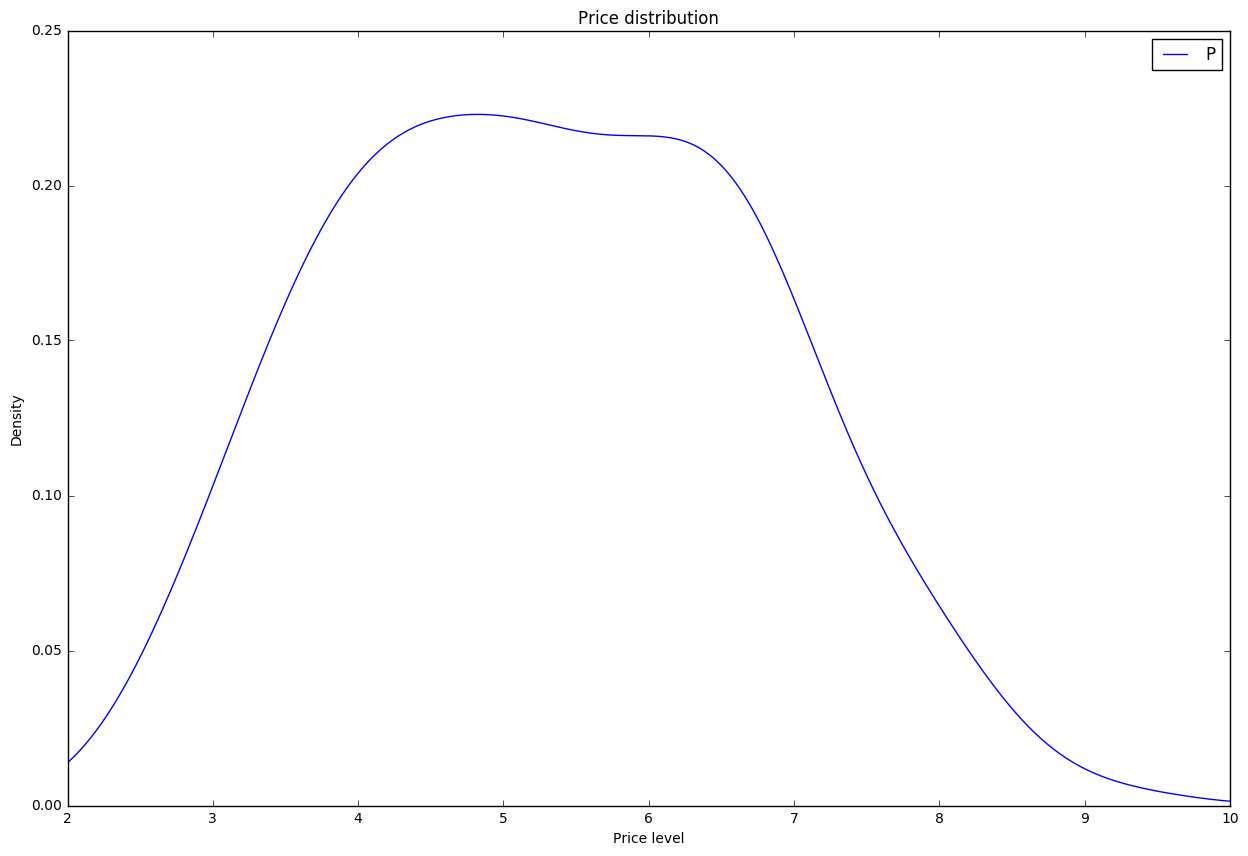

In [25]:
# caractéristiques
fig = plt.figure(figsize=(15,10), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# densité estimée de la répartition des montants perçus par profession
ax2 = plt.subplot2grid((1,1),(0,0))
du["price_of_goods"].plot(kind='kde')

#limites du graphe, légende, titres
ax2.set_xlim(2, 10)
plt.legend(("Price of goods"),loc='best')
plt.xlabel("Price level")    
plt.title("Price distribution")
plt.show()

Contraction Mapping

In [27]:
def newton(x0,eps,a):
    t=0
    x=x0
    y=x-(a-x**2)/(a-2*x)
    while np.abs(x-y)>eps:
        t+=1
        x=y
        y=x-(a-x**2)/(a-2*x)
    return print("racine: ",y,"racine: ",-y, "nombre d'iterations : ",t)

newton(2,0.001,5)

racine:  -2.235118722852569 racine:  2.235118722852569 nombre d'iterations :  13


Questions : 
1/ Should we use the observable characteristics of other products as instruments for the price?
2/ Should we include the outside good in the data?
3/ How do we show that the derivative of the market share on the price in the logit model is equal to alpha*s*(1-s) ?
4/ Why not use an instrumental regression in the question 2 to estimate p; just like in Question 1?